***Context***

***This is the sentiment140 dataset. It contains around 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .***

**Content**

It contains the following 6 fields:

target  :  The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids               :  The id of the tweet ( 2087)

date        :  The date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag       :  The query (lyx). If there is no query, then this value is NO_QUERY.

user        :  The user that tweeted (robotickilldozr)

text       :  The text of the tweet (Lyx is cool)

# Step 1 : Import libraries

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


# Step 2 : Read Data

In [2]:
# Read data
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',
                   encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Here I can see data having no header so I can fix header**

In [3]:
# set columns header
data.columns = ['Target','ids','Date','Flag','User','Text']
data

,Target,ids,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Step 3 : Perfrom EDA on Data

In [4]:
print("The shape of Data is : ",data.shape)

The shape of Data is :  (1599999, 6)


In [5]:
# count of data
data.count()

Target    1599999
ids       1599999
Date      1599999
Flag      1599999
User      1599999
Text      1599999
dtype: int64

In [6]:
# Check data having missing values or not 
data.isnull().sum()

Target    0
ids       0
Date      0
Flag      0
User      0
Text      0
dtype: int64

**There is no missing values in Data so I can perform Analysis**

In [7]:
# check info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


**From this I get to know there are no missing values as well as 2 integer and 4 object datatype but 
date should be in datetime format so I will use pd.datetime()**

In [8]:
data['Date']=  pd.to_datetime(data['Date'], infer_datetime_format=True)

In [9]:
# again check info to see changes are done or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Target  1599999 non-null  int64         
 1   ids     1599999 non-null  int64         
 2   Date    1599999 non-null  datetime64[ns]
 3   Flag    1599999 non-null  object        
 4   User    1599999 non-null  object        
 5   Text    1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


In [10]:
# lets set Target 4 as positive tweets and 0 as negative
data["Target"] = data["Target"].replace(4,"Positive")
data["Target"] = data["Target"].replace(0,"Negative")

In [11]:
# see final data after changes 
data.head()

,Target,ids,Date,Flag,User,Text
0,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Negative,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Here I can see date object is converted into datetime format**

# Step 4 : Data Preprocessing

In [12]:
# 4.1: Selecting the text and Target column for our further analysis
df  = data[["Text","Target"]]
df.head()

,Text,Target
0,is upset that he can't update his Facebook by ...,Negative
1,@Kenichan I dived many times for the ball. Man...,Negative
2,my whole body feels itchy and like its on fire,Negative
3,"@nationwideclass no, it's not behaving at all....",Negative
4,@Kwesidei not the whole crew,Negative


In [13]:
# lets set Target 4 as positive tweets and 0 as negative
data["Target"] = data["Target"].replace("Positive",4)
data["Target"] = data["Target"].replace("Negative",0)

In [14]:
# 4.2: Separating positive and negative tweets

data_pos = data[data['Target'] == 4]
data_neg = data[data['Target'] == 0]

In [15]:
# 1 fourth part of dataset
#data_pos.shape
800000/4

200000.0

In [16]:
# 4.3 : Taking one-fourth of the data so we can run it on our machine easily

data_pos = data_pos.iloc[:int(200000)]
data_neg = data_neg.iloc[:int(200000)]

In [17]:
# 4.4 : Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])
dataset.head()

,Target,ids,Date,Flag,User,Text
799999,4,1467822272,2009-04-06 22:22:45,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,2009-04-06 22:22:45,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,2009-04-06 22:22:46,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,2009-04-06 22:22:46,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,2009-04-06 22:22:46,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


# Step 6 : Text Pre-processing steps:

Step 1 -> Converting everything into lower or an upper cases.

Step 2 -> Remove all the special characters (such as @, #, !, numbers).

Step 3 -> Remove the stop words.

Step 4 -> Remove URL's

Step 5 -> Remove

In [18]:
# Step 6.1 - text pre-processing
dataset['Text'] = dataset['Text'].str.lower().str.replace('[^a-z\']', ' ') 

In [19]:
# Step 6.2 : Downloading stopwords
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Here is a list of stop word I need to remove them**

In [20]:
# Step 6.3 : Removing all the stopwords.
# Lets create a user defined function which will split the text into a list of words 
# and then match 
# the words with the words in stop_list, and give us the output after removing stopwords.
# Cleaning URL's
# removing numeric


def sw(x):
    x = [word for word in x.split() if word not in stop]  
    # Remove Stopwords
    return ' '.join (x)
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)  
    # Cleaning and removing URLs
    dataset['Text'] = dataset['Text'].apply(lambda x: sw(x))
    return re.sub('[0-9]+', '', data)                          
    # Cleaning and removing numeric numbers
    dataset['Text'] = dataset['Text'].apply(lambda x: sw(x))
    

In [21]:
# Step 6.4  Applying our user defined function on text column and then storing result 
# in same column
dataset['Text'] = dataset['Text'].apply(sw)


In [22]:
dataset['Text'] = dataset['Text'].apply(lambda x:x.split())


In [23]:
# Lets check clean text
dataset["Text"]

799999           [love, health, uandpets, u, guys, r, best]
800000    [im, meeting, one, besties, tonight, cant, wai...
800001    [darealsunisakim, thanks, twitter, add, sunisa...
800002    [sick, really, cheap, hurts, much, eat, real, ...
800003                    [lovesbrooklyn, effect, everyone]
                                ...                        
199995                                               [work]
199996    [damienfranco, common, crash, find, delete, pr...
199997            [baby, boy, wearing, big, boy, underwear]
199998                  [fml, forgot, phone, charger, home]
199999    [can't, believe, wait, another, months, phone,...
Name: Text, Length: 400000, dtype: object

In [24]:
# 6.5 applying stemming

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
    

In [25]:
dataset['Text']= dataset['Text'].apply(lambda x: stemming_on_text(x))


In [26]:
dataset["Text"][20]

['one',
 'friend',
 'called',
 'asked',
 'meet',
 'mid',
 'valley',
 'today',
 "i've",
 'time',
 'sigh']

In [27]:
# dataset.shape
400000/4

100000.0

**Plot image showing most frequent used word**

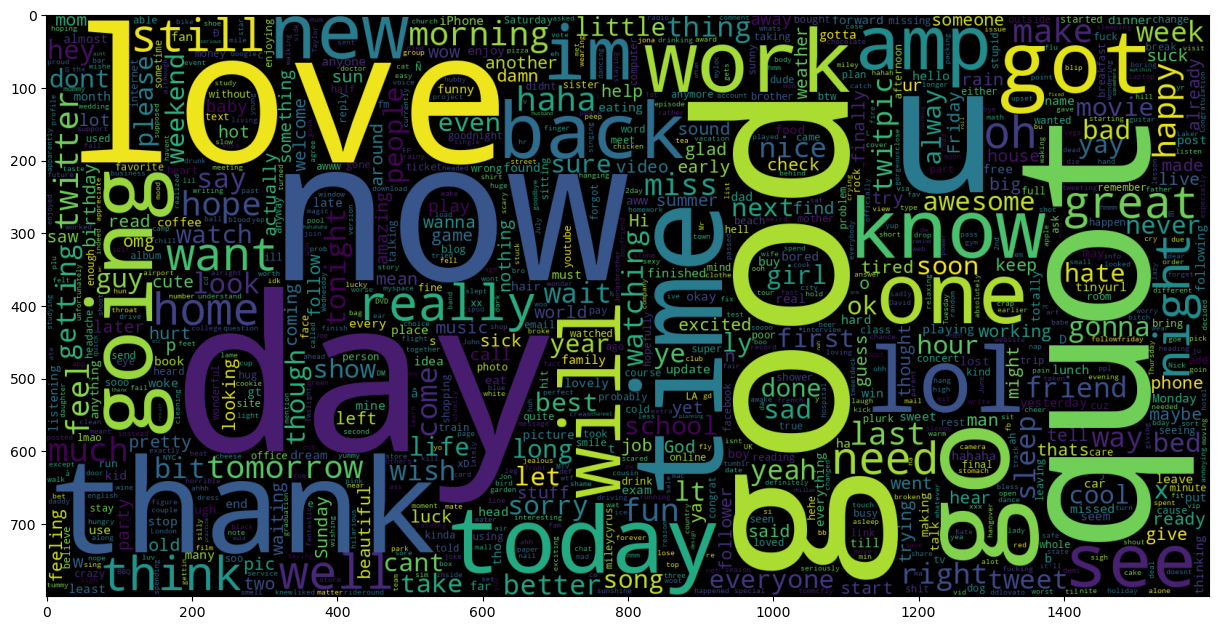

In [28]:
#6.7 import worldcloud to see maximum words in tweet

from wordcloud import WordCloud

data_neg = df['Text'][400000:]
plt.figure(figsize = (15,8))
wc_neg = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc_neg)

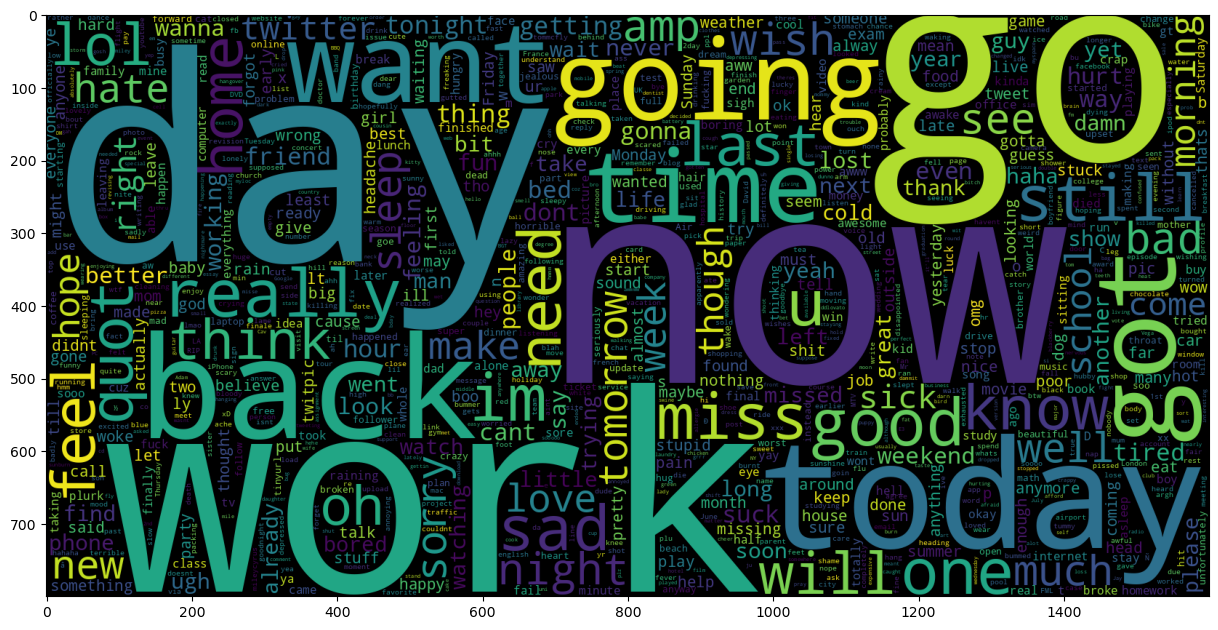

In [29]:
# 6.8: Plot a cloud of words for positive tweets

data_pos = df['Text'][:400000]
wc_pos = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (15,8))
plt.imshow(wc_pos)

# Step-7: Splitting Our Data Into Train and Test Subsets

In [30]:

from sklearn.model_selection import train_test_split
# Split data into features and labels
X = data['Text']
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step-8 : Transforming the Dataset Using TF-IDF Vectorizer

In [31]:
# using sklearn import  TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # for creating our Bag of words

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [32]:
feature_names = vectorizer.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 589209

First 20 features:
 ['00' '000' '0000' '00000' '000000000000' '0000001' '000001' '000014'
 '00004873337e0033fea60' '00009' '0000ff' '0001110101001010000111' '0001t'
 '0003' '000aah' '000albums' '000followers' '000ft' '000gbp' '000hagds']


# Step-9: Model Building

***Model 1 :logisticRegresion***

In [33]:
# Build model 1 :logisticRegresion

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay

In [34]:
#create model object
logreg = LogisticRegression()

#fit model object
logreg.fit(X_train_tfidf, y_train)

#Predict model object
logreg_pred = logreg.predict(X_test_tfidf)

#check accuracy
logreg_acc = accuracy_score(logreg_pred, y_test)

#Print accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

print("confusion matrix : ")
confusion_matrix(logreg_pred, y_test)

Test accuracy: 80.22%
confusion matrix : 


array([[126436,  30243],
       [ 33058, 130263]])

In [35]:
print(classification_report(logreg_pred, y_test))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80    156679
           4       0.81      0.80      0.80    163321

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [36]:
from matplotlib import style
style.use('ggplot')

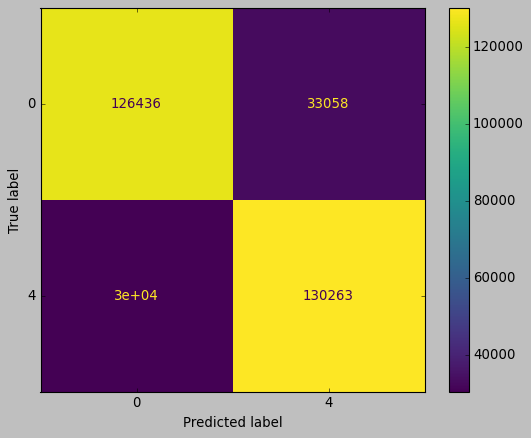

In [37]:
# Graphical representation for confusion matric
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [38]:
# Creating the model using on the training data set 

## Create our model object

from sklearn.naive_bayes import BernoulliNB

#create model object
BNBmodel = BernoulliNB()

# fit model
BNBmodel.fit(X_train_tfidf, y_train)

#predict model
BNBmodel_pred = BNBmodel.predict(X_test_tfidf)

# check accuracy
BNBmodel_acc = accuracy_score(BNBmodel_pred, y_test)

#Print  test accuracy
print("Test accuracy: {:.2f}%".format(BNBmodel_acc*100))


print("confusion matrix : ")
confusion_matrix(BNBmodel_pred, y_test)

Test accuracy: 78.26%
confusion matrix : 


array([[128517,  38591],
       [ 30977, 121915]])

In [39]:
print(classification_report(BNBmodel_pred, y_test))


              precision    recall  f1-score   support

           0       0.81      0.77      0.79    167108
           4       0.76      0.80      0.78    152892

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



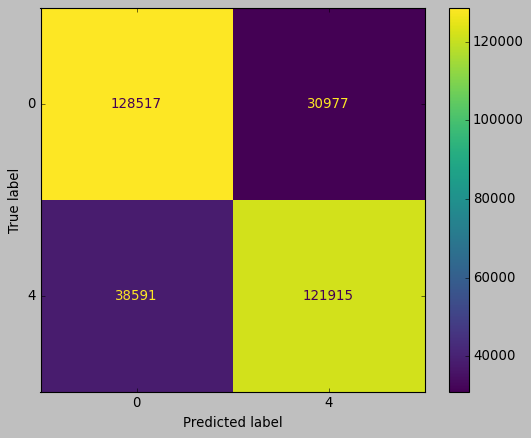

In [40]:
# Graphical representation for confusion matric
style.use('classic')
cm_1 = confusion_matrix(y_test,BNBmodel_pred , labels=BNBmodel.classes_)
disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels=BNBmodel.classes_)
disp_1.plot()

***Model 3 - Linear SVC***

In [41]:
# Creating the model using on the training data set 

## Create our model object

from sklearn.svm import LinearSVC

#create model object
SVCmodel = LinearSVC()

# fit model
SVCmodel.fit(X_train_tfidf, y_train)

#predict model
SVCmodel_pred = SVCmodel.predict(X_test_tfidf)

# check accuracy
SVC_acc  = accuracy_score(SVCmodel_pred, y_test)

#Print  test accuracy
print("Test accuracy: {:.2f}%".format(SVC_acc*100))

print("confusion matrix : " ,confusion_matrix(SVCmodel_pred, y_test))

Test accuracy: 79.61%
confusion matrix :  [[126193  31935]
 [ 33301 128571]]


In [42]:
print(classification_report(SVCmodel_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79    158128
           4       0.80      0.79      0.80    161872

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



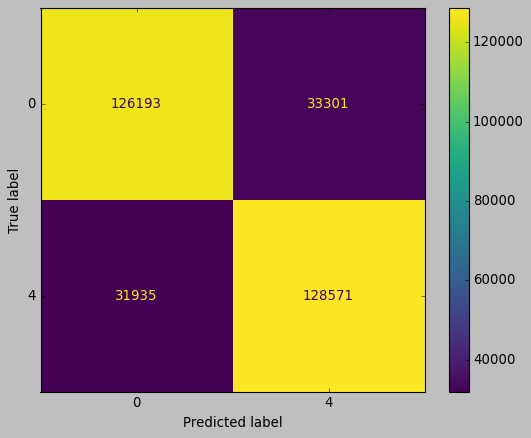

In [43]:
# Graphical representation for confusion matric
style.use('classic')
cm_1 = confusion_matrix(y_test,SVCmodel_pred , labels=SVCmodel.classes_)
disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels=SVCmodel.classes_)
disp_1.plot()

# Step-10: Model Evaluation
Upon evaluating all the models, we can conclude the following details i.e.

**Accuracy :** As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

**F1-score :** The F1 Scores for class 0 and class 1 are :

**(a) For class 0:** Bernoulli Naive Bayes(accuracy = 0.79) < SVM (accuracy =0.79) < Logistic Regression (accuracy = 0.80)

**(b) For class 1:** Bernoulli Naive Bayes (accuracy = 0.78) < SVM (accuracy = 0.80) < Logistic Regression (accuracy = 0.80)